# Assignment 2
---
Members
1. Kanyaluck Chimchome (64070501003)
2. Boonyarit Samran (64070501028)
3. Warisara Patib (64070501044)
4. Chanidapa Chanama (64070501090)
5. Nontawat Kunlayawuttipong (64070501093)
6. Nuttanon Yolnawa (64070507205)

In [1]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

# Suppress valuewarning when fitting ARIMA model.
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)


# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Decision Tree 

## Load data

In [2]:
import pandas as pd
enroll_df = pd.read_excel('data/tree-based.xlsx', sheet_name='ENROLL')

<font color='blue'>Look at the first few rows

In [3]:
enroll_df.head()

,Age,Income,Jobsatisfaction,Desire,Enrolls
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31 to 40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes


<font color='blue'>Inspect basic information of dataset

In [4]:
enroll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              14 non-null     object
 1   Income           14 non-null     object
 2   Jobsatisfaction  14 non-null     object
 3   Desire           14 non-null     object
 4   Enrolls          14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [5]:
enroll_df.describe(include='all')

,Age,Income,Jobsatisfaction,Desire,Enrolls
count,14,14,14,14,14
unique,3,3,2,2,2
top,<=30,Medium,No,Fair,Yes
freq,5,6,7,8,9


In [6]:
# Rename column
enroll_df.rename({'Jobsatisfaction': 'JobSat', 'Enrolls':'Target'}, axis=1, inplace=True)
enroll_df

,Age,Income,JobSat,Desire,Target
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31 to 40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31 to 40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


In [7]:
enroll_df.rename({'Jobsatisfaction': 'JobSat', 'Enrolls':'Target'}, axis=1, inplace=True)
enroll_df

,Age,Income,JobSat,Desire,Target
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31 to 40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes
5,>40,Low,Yes,Excellent,No
6,31 to 40,Low,Yes,Excellent,Yes
7,<=30,Medium,No,Fair,No
8,<=30,Low,Yes,Fair,Yes
9,>40,Medium,Yes,Fair,Yes


<font color='blue'> Run data profiling 


In [9]:
import ydata_profiling

In [11]:
enroll_df.profile_report()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


## Data preprocessing

In [13]:
df = enroll_df.copy()

<font color='blue'>One-hot encoding of columns `JobSat` and `Desire`

In [14]:
onehot_columns = ['JobSat','Desire']
df = pd.get_dummies(df, columns=onehot_columns)

In [15]:
df

,Age,Income,Target,JobSat_No,JobSat_Yes,Desire_Excellent,Desire_Fair
0,<=30,High,No,True,False,False,True
1,<=30,High,No,True,False,True,False
2,31 to 40,High,Yes,True,False,False,True
3,>40,Medium,Yes,True,False,False,True
4,>40,Low,Yes,False,True,False,True
5,>40,Low,No,False,True,True,False
6,31 to 40,Low,Yes,False,True,True,False
7,<=30,Medium,No,True,False,False,True
8,<=30,Low,Yes,False,True,False,True
9,>40,Medium,Yes,False,True,False,True


<font color='blue'>Label encoding of columns `Age`, `Income`, `Target`

In [16]:
Age_cat = ['<=30', '31 to 40', '>40']
df['Age']=df['Age'].apply(lambda x: Age_cat.index(x))
Income_cat = ['Low', 'Medium', 'High']
df['Income']=df['Income'].apply(lambda x: Income_cat.index(x))
Target_cat = ['No', 'Yes']
df['Target']=df['Target'].apply(lambda x: Target_cat.index(x))

Separate feature set and target variable

In [17]:
X = df.drop('Target', axis=1)
Y = df[['Target']]
X
Y

,Age,Income,JobSat_No,JobSat_Yes,Desire_Excellent,Desire_Fair
0,0,2,True,False,False,True
1,0,2,True,False,True,False
2,1,2,True,False,False,True
3,2,1,True,False,False,True
4,2,0,False,True,False,True
5,2,0,False,True,True,False
6,1,0,False,True,True,False
7,0,1,True,False,False,True
8,0,0,False,True,False,True
9,2,1,False,True,False,True


,Target
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42)

## Model fitting and prediction

<font color='blue'>Fit the decision tree model to the train data

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Make some prediction

In [35]:
# Predict result 
#{Age <= 30, Income = 'Medium', Job = 'Yes', Desire = 'Fair'} => Enroll = 'Yes' with probability 1.
#{Age > 40, Income = 'Medium', Job = 'No', Desire = 'Excellent'} 
Xnew = [1,0,0,1,1,1]
#Xnew = [0,1,0,1,0,0]
dt_clf.predict([Xnew]) 
dt_clf.predict_proba([Xnew])

array([1])

array([[0., 1.]])

## Evaluate performance

<font color='blue'>Determine the classification report for the train data

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, dt_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Visualizing tree

In [37]:
from sklearn import tree

text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_4 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 0



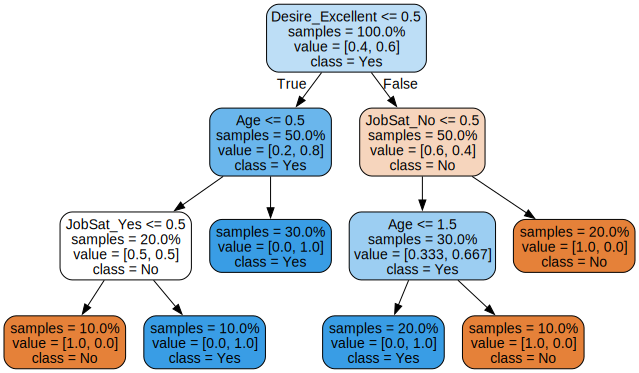

In [39]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=enroll_df['Target'].unique(), impurity=False,
                           filled=True, rounded=True, proportion=True)
# Draw graph
graph = graphviz.Source(dot_data, format='png')  
graph

## Feature Importance

<font color='blue'>Create a list of feature importance and sort.

In [40]:
feature_list = pd.DataFrame({'feature':X.columns, 'value':dt_clf.feature_importances_})
feature_list_sorted = feature_list.sort_values('value')
feature_list_sorted

,feature,value
1,Income,0.000000
5,Desire_Fair,0.000000
4,Desire_Excellent,0.166667
3,JobSat_Yes,0.208333
2,JobSat_No,0.222222
0,Age,0.402778


Plot the feature importance

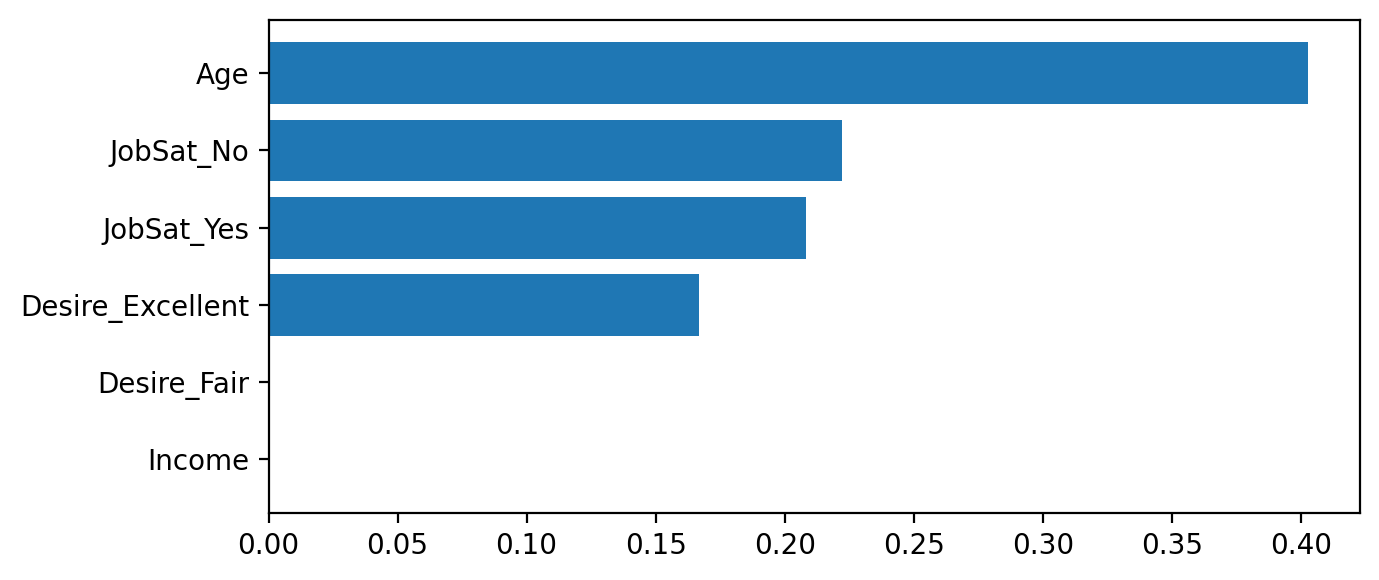

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.barh(range(0,len(feature_list_sorted.index)), 
         feature_list_sorted.value, tick_label=feature_list_sorted.feature)
plt.tight_layout();

# <font color='darkorange'> Your Turn -- CHURN dataset

## Load and explore data

In [42]:
enroll_df = pd.read_excel('data/tree-based.xlsx', sheet_name='CHURN')

In [43]:
enroll_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128.0,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107.0,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137.0,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84.0,408,375-9999,yes,no,0,299.4,71.0,50.90,...,88,5.26,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75.0,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False


In [45]:
enroll_df.describe(include='all')

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333,3200.000000,3333.000000,3333,3333,3333,3333.000000,3233.000000,3266.000000,3333.000000,...,3333.000000,3333.000000,3166.000000,3133.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,100.885312,437.182418,NaN,NaN,NaN,8.099010,179.949521,100.429884,30.562307,...,100.114311,17.083540,200.796494,100.108841,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.699264,42.371290,NaN,NaN,NaN,13.688365,54.477791,20.104204,9.259435,...,19.922625,4.310668,50.711703,19.603476,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,144.000000,87.000000,24.430000,...,87.000000,14.160000,166.900000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.500000,101.000000,30.500000,...,100.000000,17.120000,201.050000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.800000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [71]:
enroll_df.nunique()

state                       51
account_length             210
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_minutes         1639
total_day_calls            119
total_day_charge          1667
total_eve_minutes         1611
total_eve_calls            123
total_eve_charge          1440
total_night_minutes       1552
total_night_calls          120
total_night_charge         933
total_intl_minutes         162
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

In [46]:
enroll_df.isna().sum()

state                       0
account_length            133
area_code                   0
phone_number                0
international_plan          0
voice_mail_plan             0
number_vmail_messages       0
total_day_minutes         100
total_day_calls            67
total_day_charge            0
total_eve_minutes           0
total_eve_calls             0
total_eve_charge            0
total_night_minutes       167
total_night_calls         200
total_night_charge          0
total_intl_minutes          0
total_intl_calls            0
total_intl_charge           0
customer_service_calls      0
churn                       0
dtype: int64

In [59]:
test_df = enroll_df[enroll_df.account_length.isna()]
test_df.isna().sum()

state                       0
account_length            133
area_code                   0
phone_number                0
international_plan          0
voice_mail_plan             0
number_vmail_messages       0
total_day_minutes           6
total_day_calls             0
total_day_charge            0
total_eve_minutes           0
total_eve_calls             0
total_eve_charge            0
total_night_minutes         4
total_night_calls           7
total_night_charge          0
total_intl_minutes          0
total_intl_calls            0
total_intl_charge           0
customer_service_calls      0
churn                       0
dtype: int64

<font color='darkorange'>**Question**: What are your findings from the data exploration?

account_length loss for 133 rows

## Data preprocessing

- Drop unused/redundant columns based on the data profiling and rows with missing values.
- Appropriately encode categorical columns
- Split data into train and test sets with 70/30 ratio.

In [60]:
clean_df = enroll_df.copy()

In [63]:
clean_df.drop(['phone_number','voice_mail_plan'],axis=1, inplace=True)

In [64]:
clean_df.head()

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128.0,415,no,25,265.1,110.0,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False
1,OH,107.0,415,no,26,161.6,123.0,27.47,195.5,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False
2,NJ,137.0,415,no,0,243.4,114.0,41.38,121.2,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False
3,OH,84.0,408,yes,0,299.4,71.0,50.90,61.9,88,5.26,196.9,89.0,8.86,6.6,7,1.78,2,False
4,OK,75.0,415,yes,0,166.7,113.0,28.34,148.3,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False


In [68]:
for column in ['total_day_minutes', 'total_night_calls', 'total_night_minutes', 'total_day_calls']: 
    clean_df[column].fillna(clean_df[column].mode()[0], inplace=True)

In [70]:
clean_df.isna().sum()

state                       0
account_length            133
area_code                   0
international_plan          0
number_vmail_messages       0
total_day_minutes           0
total_day_calls             0
total_day_charge            0
total_eve_minutes           0
total_eve_calls             0
total_eve_charge            0
total_night_minutes         0
total_night_calls           0
total_night_charge          0
total_intl_minutes          0
total_intl_calls            0
total_intl_charge           0
customer_service_calls      0
churn                       0
dtype: int64

In [73]:
clean_df.dropna(inplace=True)

In [75]:
clean_df.describe(include='all')

,state,account_length,area_code,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3200,3200.000000,3200.000000,3200,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200
unique,51,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,99,NaN,NaN,2886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2736
mean,NaN,100.885312,436.814375,NaN,8.084687,179.188313,100.472500,30.568331,201.040531,100.243750,17.088669,200.134281,100.423125,9.040031,10.237875,4.488750,2.764722,1.562500,NaN
std,NaN,39.699264,42.182317,NaN,13.679149,53.893046,19.916547,9.262892,50.715030,19.876595,4.310760,49.414496,18.967232,2.272019,2.805509,2.459144,0.757465,1.320658,NaN
min,NaN,1.000000,408.000000,NaN,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,0.000000,145.400000,88.000000,24.430000,166.475000,87.000000,14.147500,168.600000,88.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,0.000000,177.150000,101.000000,30.460000,201.450000,101.000000,17.125000,196.900000,102.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,415.000000,NaN,19.000000,215.600000,114.000000,36.820000,235.500000,114.000000,20.020000,233.125000,112.000000,10.600000,12.100000,6.000000,3.270000,2.000000,NaN


In [77]:
clean_df.dtypes

state                      object
account_length            float64
area_code                   int64
international_plan         object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls           float64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls         float64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [79]:
onehot_columns = ['state']
clean_df = pd.get_dummies(clean_df, columns=onehot_columns)

In [82]:
clean_df.replace(['yes', 'no'], [True, False], inplace=True)

In [84]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3200 non-null   float64
 1   area_code               3200 non-null   int64  
 2   international_plan      3200 non-null   bool   
 3   number_vmail_messages   3200 non-null   int64  
 4   total_day_minutes       3200 non-null   float64
 5   total_day_calls         3200 non-null   float64
 6   total_day_charge        3200 non-null   float64
 7   total_eve_minutes       3200 non-null   float64
 8   total_eve_calls         3200 non-null   int64  
 9   total_eve_charge        3200 non-null   float64
 10  total_night_minutes     3200 non-null   float64
 11  total_night_calls       3200 non-null   float64
 12  total_night_charge      3200 non-null   float64
 13  total_intl_minutes      3200 non-null   float64
 14  total_intl_calls        3200 non-null   int64

In [85]:
X_churn = clean_df.drop('churn', axis=1)
y_churn = clean_df[['churn']]
X_churn
y_churn

,account_length,area_code,international_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128.0,415,False,25,265.1,110.0,45.07,197.4,99,16.78,...,False,False,False,False,False,False,False,False,False,False
1,107.0,415,False,26,161.6,123.0,27.47,195.5,103,16.62,...,False,False,False,False,False,False,False,False,False,False
2,137.0,415,False,0,243.4,114.0,41.38,121.2,110,10.30,...,False,False,False,False,False,False,False,False,False,False
3,84.0,408,True,0,299.4,71.0,50.90,61.9,88,5.26,...,False,False,False,False,False,False,False,False,False,False
4,75.0,415,True,0,166.7,113.0,28.34,148.3,122,12.61,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,415,False,36,156.2,77.0,26.55,215.5,126,18.32,...,False,False,False,False,False,False,False,False,False,False
3329,68.0,415,False,0,231.1,57.0,39.29,153.4,55,13.04,...,False,False,False,False,False,False,False,False,True,False
3330,28.0,510,False,0,180.8,109.0,30.74,288.8,58,24.55,...,False,False,False,False,False,False,False,False,False,False
3331,184.0,510,True,0,213.8,105.0,36.35,159.6,84,13.57,...,False,False,False,False,False,False,False,False,False,False


,churn
0,False
1,False
2,False
3,False
4,False
...,...
3328,False
3329,False
3330,False
3331,False


In [86]:
from sklearn.model_selection import train_test_split
X_churn_train, X_churn_test, y_churn_train, y_churn_test = train_test_split(X_churn, y_churn,random_state=42)

## Model fitting and prediction
Fit the decision tree classifier with default hypermeters to the train data. 

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt_clf_churn = DecisionTreeClassifier()
dt_clf_churn.fit(X_churn_train, y_churn_train)

DecisionTreeClassifier()

In [88]:
# Predict test
dt_clf_churn.predict(X_churn_train[0:2])
dt_clf_churn.predict_proba(X_churn_train[0:2])

array([False, False])

array([[1., 0.],
       [1., 0.]])

## Visualizing results
- Print out the decision rules
- Print out the fitted decision tree
- Show the feature importance plot

In [89]:
from sklearn import tree
text_representation = tree.export_text(dt_clf_churn)
print(text_representation)

|--- feature_6 <= 45.12
|   |--- feature_16 <= 3.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_6 <= 37.95
|   |   |   |   |--- feature_60 <= 0.50
|   |   |   |   |   |--- feature_3 <= 47.50
|   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |--- feature_10 <= 241.85
|   |   |   |   |   |   |   |   |--- feature_3 <= 39.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 120.50
|   |   |   |   |   |   |   |   |   |   |--- feature_47 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_47 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_0 >  120.50
|   |   |   |   |   |   |   |   |   |   |--- feature_57 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_57 >  0.50
|   |   |   |   |   |   |   |

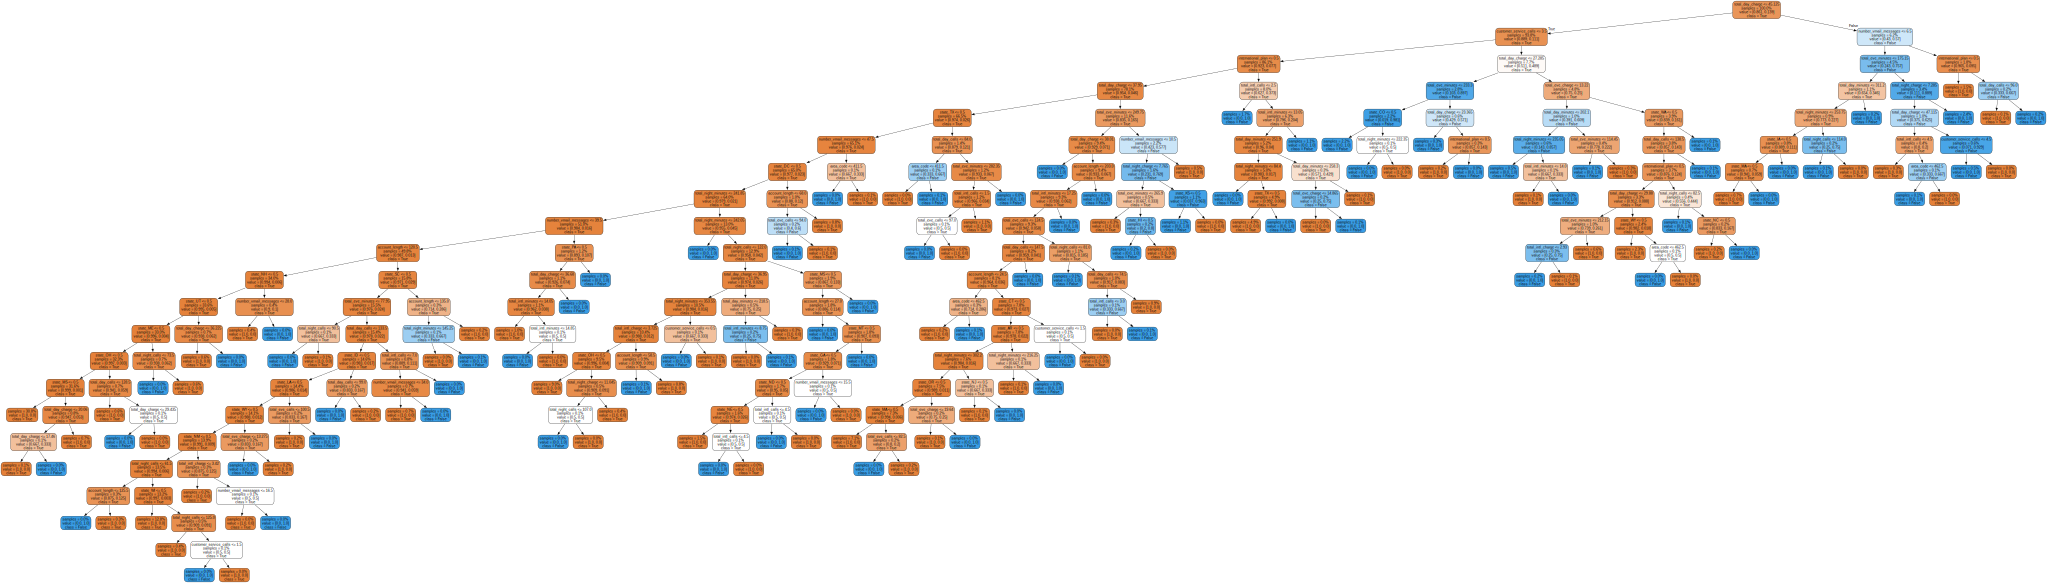

In [93]:
import graphviz
from sklearn import tree

d_data_churn = tree.export_graphviz(dt_clf_churn, out_file=None,
 feature_names=X_churn.columns,
class_names=["True", "False"], impurity=False,
 filled=True, rounded=True, proportion=True)
# Draw graph
graph = graphviz.Source(d_data_churn, format='png')
graph

## Model Tuning

- Perform Grid-search CV on `criterion`, `max_depth`, `max_features`, `splitter` by using F1
as the scoring metric.
- Show the tuned hyperparameter sets and the corresponding scores.
- Perform K-fold CV on the whole dataset using the tuned hyperparameters and compare the performance
results with the untuned model.
- Display the decision tree of the tuned model.

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [102]:
# Specify the value of features to tune here.
param_grid = {
 'criterion': ["gini", "entropy", "log_loss"],
 'max_depth': [5,10,15,20],
 'max_features': [5, 10, 15, 20],
 'splitter': ["best", "random"],
}
dt_gridsearch = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', verbose=True)
dt_gridsearch.fit(X_churn_train, y_churn_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=True)

In [103]:
pd.DataFrame(dt_gridsearch.cv_results_).sort_values('mean_test_score', ascending=False)
dt_gridsearch.best_params_ # Tuned hyperparameters
dt_gridsearch.best_score_ # Best score
dt_gridsearch.best_estimator_ # Tuned model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
46,0.008529,0.000541,0.003470,0.000021,entropy,10,20,best,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.655738,0.728682,0.656000,0.725806,0.741935,0.701632,0.037760,1
78,0.008815,0.000620,0.003702,0.000133,log_loss,10,20,best,"{'criterion': 'log_loss', 'max_depth': 10, 'ma...",0.655172,0.719298,0.621849,0.725806,0.774194,0.699264,0.054143,2
12,0.006876,0.000458,0.003466,0.000058,gini,10,15,best,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.705882,0.796992,0.508772,0.757576,0.603175,0.674479,0.105303,3
30,0.012221,0.001258,0.004657,0.001276,gini,20,20,best,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.666667,0.696296,0.604317,0.689655,0.703448,0.672077,0.036057,4
14,0.008658,0.000358,0.003472,0.000025,gini,10,20,best,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.598425,0.734375,0.666667,0.725926,0.614173,0.667913,0.055679,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.002933,0.001026,0.004318,0.001235,entropy,10,5,random,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.125000,0.076923,0.195122,0.210526,0.225000,0.166514,0.056438,92
81,0.002423,0.000033,0.003401,0.000020,log_loss,15,5,random,"{'criterion': 'log_loss', 'max_depth': 15, 'ma...",0.025641,0.000000,0.112360,0.255319,0.336842,0.146032,0.130618,93
3,0.002065,0.000021,0.003363,0.000023,gini,5,10,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.000000,0.387755,0.177778,0.028986,0.000000,0.118904,0.149739,94
33,0.001950,0.000032,0.003380,0.000051,entropy,5,5,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.028986,0.177215,0.111111,0.054795,0.000000,0.074421,0.063089,95


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 20,
 'splitter': 'best'}

0.7016323621889078

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=20)

## Compare Tuned Model with Untuned Model

- Tuned Model

In [105]:
scoring_metrics = ['accuracy','precision_macro','recall_macro', 'f1_macro']
scores = cross_validate(dt_gridsearch.best_estimator_, X_churn_train, y_churn_train,
 scoring=scoring_metrics, cv = 5, return_train_score= False)
scores_df = pd.DataFrame(scores)
scores_df
scores_df.mean()

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.009792,0.011136,0.908333,0.811905,0.787659,0.799018
1,0.008708,0.010416,0.954167,0.922863,0.879585,0.899509
2,0.010135,0.010774,0.902083,0.801190,0.774294,0.786749
3,0.008545,0.010249,0.906250,0.805556,0.801724,0.803620
4,0.010302,0.009951,0.906250,0.820723,0.757960,0.784171


fit_time                0.009496
score_time              0.010505
test_accuracy           0.915417
test_precision_macro    0.832447
test_recall_macro       0.800244
test_f1_macro           0.814613
dtype: float64

- Untuned Model

In [106]:
scoring_metrics = ['accuracy','precision_macro','recall_macro', 'f1_macro']
scores = cross_validate(dt_clf_churn, X_churn_train, y_churn_train,
 scoring=scoring_metrics, cv = 5, return_train_score= False)
scores_df = pd.DataFrame(scores)
scores_df
scores_df.mean()

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.028127,0.011128,0.897917,0.784377,0.787989,0.786164
1,0.028431,0.010688,0.927083,0.865735,0.813830,0.836816
2,0.032164,0.010210,0.904167,0.797348,0.819269,0.807666
3,0.030526,0.010044,0.918750,0.824890,0.852752,0.837893
4,0.032085,0.010332,0.900000,0.790860,0.798092,0.794403


fit_time                0.030267
score_time              0.010480
test_accuracy           0.909583
test_precision_macro    0.812642
test_recall_macro       0.814386
test_f1_macro           0.812588
dtype: float64

## Decision Tree of Tuned Model

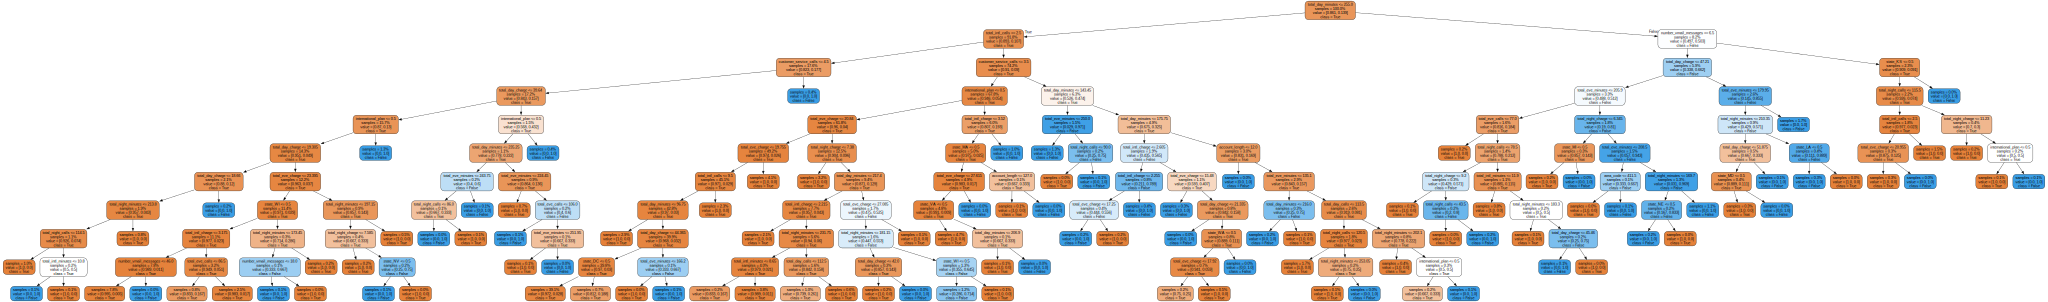

In [107]:
d_data_churn_tuned = tree.export_graphviz(dt_gridsearch.best_estimator_, out_file=None,
 feature_names=X_churn.columns,
class_names=["True", "False"], impurity=False,
 filled=True, rounded=True, proportion=True)
# Draw graph
graph = graphviz.Source(d_data_churn_tuned, format='png')
graph